# Librairies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# algorithmes utilisés :
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

C:\Users\Paul\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Lecture du dataset

In [2]:
col = ["height","lenght","area","eccen","p_black","p_and","mean_tr","blackpix","blackand","wb_trans","classes"]
df = pd.read_csv("page-blocks.csv", sep=';',header=None, names=col,index_col=False)

# Split du dataset

Séparons de manière aléatoire le dataset en un train set et un test set (80% - 20%) qui nous permettront d'éviter l'overfitting.

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df, df["classes"], test_size=0.2, random_state = 7)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4378, 11) (4378,)
(1095, 11) (1095,)


In [4]:
x_train.groupby('classes').count()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
classes,,,,,,,,,,
1,3935,3935,3935,3935,3935,3935,3935,3935,3935,3935
2,264,264,264,264,264,264,264,264,264,264
3,20,20,20,20,20,20,20,20,20,20
4,68,68,68,68,68,68,68,68,68,68
5,91,91,91,91,91,91,91,91,91,91


In [5]:
x_test.groupby('classes').count()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
classes,,,,,,,,,,
1,978,978,978,978,978,978,978,978,978,978
2,65,65,65,65,65,65,65,65,65,65
3,8,8,8,8,8,8,8,8,8,8
4,20,20,20,20,20,20,20,20,20,20
5,24,24,24,24,24,24,24,24,24,24


# Modelisation

Le contexte de notre modélisation est une classification avec 5 classes possibles (text, horizontal line, vertical line, graphic, picture). Pour trouver le modèle avec les meilleurs résultats, plusieurs modèles préseléctionnés vont être testés avec des paramètres non-optimisés puis ces modèles seront comparés.

### Comparaison des modèles

In [6]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('MNB', MultinomialNB()))
models.append(('BNB', BernoulliNB()))
models.append(('MLP', MLPClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [7]:
results = []
names = []
results_mean =  []
scoring = 'accuracy'
seed = 7
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    results_mean.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.984464 (0.007368)
KNN: 0.957516 (0.009905)
CART: 0.999772 (0.000685)
RF: 0.997944 (0.002788)
ET: 0.999543 (0.000914)
MNB: 0.913431 (0.012933)
BNB: 0.898816 (0.014135)
MLP: 0.957968 (0.005546)
GB: 0.999086 (0.001515)


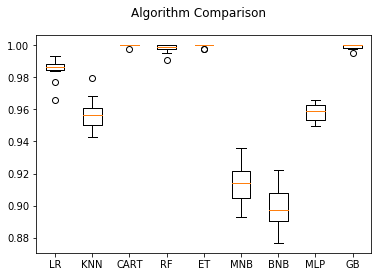

In [8]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Nous pouvons voir grâce au graphique précédent que les modèles de Naive Bayes (Bernouilli et multinomial) ne font pas mieux que les 89% évoqués dans l'exploration des données. 
Nous pouvons aussi remarquer que les modèles Extra Tree, Gradient boosting et CART ont un score parfait, ce qui laissent planner le doute du sur-apprentissage.

In [9]:
results_mean = pd.DataFrame(results_mean)
results_mean['name'] = names
results_mean.columns = ['score', 'name']
results_mean=results_mean.sort_values('score', ascending=False)
results_mean.drop(results_mean.tail(2).index,inplace=True)

(0.94, 1)

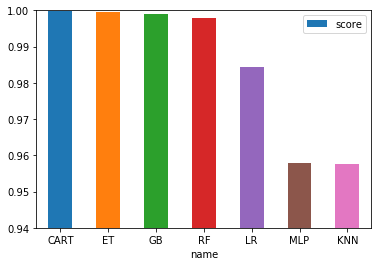

In [10]:
ax = results_mean.plot.bar(x='name', y='score', rot=0)
ax.set_ylim(ymin=0.94,ymax=1)

Nous remarquons que les résultats sont excellents pour 1 modèle en particulier : CART. Pour réaliser les prédictions sur le jeu de test, nous allons choisir le modèle CART.

In [12]:
models[2][1].fit(x_train, y_train)
y_pred = models[2][1].predict(x_test)
from sklearn import metrics
print(models[2][0], "accuracy :", metrics.accuracy_score(y_test, y_pred))

CART accuracy : 1.0


La précision des prédictions est de 100%, le modèle explique parfaitement la classe d'un élément d'une page par rapport aux observation. Ce test étant fait sur un dataset sur lequel le modèle n'a pas été entraîné, cela signifie que l'algorithme ne fait pas de suraprentissage.

La sélection des features ainsi que l'optimistation des hyper-paramètres n'a pas été nécéssaire.